In [16]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder 
from sklearn.metrics import r2_score ,mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler

from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR

from sklearn.model_selection import GridSearchCV

In [4]:
df = pd.read_csv('/kaggle/input/qs-world-university-rankings-2025/QS World University Rankings 2025 (Top global universities).csv' , encoding = 'latin1')

In [5]:
df.head()

,RANK_2025,RANK_2024,Institution_Name,Location,Region,SIZE,FOCUS,RES.,STATUS,Academic_Reputation_Score,...,International_Faculty_Rank,International_Students_Score,International_Students_Rank,International_Research_Network_Score,International_Research_Network_Rank,Employment_Outcomes_Score,Employment_Outcomes_Rank,Sustainability_Score,Sustainability_Rank,Overall_Score
0,1,1,Massachusetts Institute of Technology (MIT),United States,Americas,M,CO,VH,B,100.0,...,100,86.8,143,96.0,58,100.0,8,99.0,15=,100
1,2,6,Imperial College London,United Kingdom,Europe,L,FC,VH,A,98.5,...,66,99.6,44,97.4,34,93.4,61,99.7,6,98.5
2,3,3,University of Oxford,United Kingdom,Europe,L,FC,VH,A,100.0,...,120,97.7,73,100.0,1,100.0,3,85.0,126,96.9
3,4,4,Harvard University,United States,Americas,L,FC,VH,B,100.0,...,269,69.0,215,99.6,5,100.0,1,84.4,130,96.8
4,5,2,University of Cambridge,United Kingdom,Europe,L,FC,VH,A,100.0,...,73,94.8,98,99.3,10,100.0,5,84.8,127=,96.7


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503 entries, 0 to 1502
Data columns (total 28 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   RANK_2025                             1503 non-null   object 
 1   RANK_2024                             1482 non-null   object 
 2   Institution_Name                      1503 non-null   object 
 3   Location                              1503 non-null   object 
 4   Region                                1503 non-null   object 
 5   SIZE                                  1503 non-null   object 
 6   FOCUS                                 1503 non-null   object 
 7   RES.                                  1503 non-null   object 
 8   STATUS                                1466 non-null   object 
 9   Academic_Reputation_Score             1503 non-null   float64
 10  Academic_Reputation_Rank              1503 non-null   object 
 11  Employer_Reputati

In [7]:
df.isnull().sum()

RANK_2025                                 0
RANK_2024                                21
Institution_Name                          0
Location                                  0
Region                                    0
SIZE                                      0
FOCUS                                     0
RES.                                      0
STATUS                                   37
Academic_Reputation_Score                 0
Academic_Reputation_Rank                  0
Employer_Reputation_Score                 0
Employer_Reputation_Rank                  0
Faculty_Student_Score                     0
Faculty_Student_Rank                      0
Citations_per_Faculty_Score               0
Citations_per_Faculty_Rank                0
International_Faculty_Score             100
International_Faculty_Rank              100
International_Students_Score             58
International_Students_Rank              58
International_Research_Network_Score      1
International_Research_Network_R

# Cleaning

In [8]:
df.dropna(subset = ['Overall_Score'] , inplace = True )


In [9]:
df.shape

(601, 28)

In [10]:

columns = ['Academic_Reputation_Score',
       'Academic_Reputation_Rank', 'Employer_Reputation_Score',
       'Employer_Reputation_Rank', 'Faculty_Student_Score',
       'Faculty_Student_Rank', 'Citations_per_Faculty_Score',
       'Citations_per_Faculty_Rank', 'International_Faculty_Score',
       'International_Faculty_Rank', 'International_Students_Score',
       'International_Students_Rank', 'International_Research_Network_Score',
       'International_Research_Network_Rank', 'Employment_Outcomes_Score',
       'Employment_Outcomes_Rank', 'Sustainability_Score',
       'Sustainability_Rank', 'Overall_Score']

for i in columns : 
    df[i] = df[i].astype(str).str.replace(r'[^0-9.]', '', regex=True)
    df[i] = pd.to_numeric(df[i], errors='coerce') 

In [11]:
df.isnull().sum()

RANK_2025                               0
RANK_2024                               4
Institution_Name                        0
Location                                0
Region                                  0
SIZE                                    0
FOCUS                                   0
RES.                                    0
STATUS                                  5
Academic_Reputation_Score               0
Academic_Reputation_Rank                0
Employer_Reputation_Score               0
Employer_Reputation_Rank                0
Faculty_Student_Score                   0
Faculty_Student_Rank                    0
Citations_per_Faculty_Score             0
Citations_per_Faculty_Rank              0
International_Faculty_Score             7
International_Faculty_Rank              7
International_Students_Score            2
International_Students_Rank             2
International_Research_Network_Score    0
International_Research_Network_Rank     0
Employment_Outcomes_Score         

In [17]:
cols = ['Academic_Reputation_Score' , 'Overall_Score' , 'International_Students_Rank' , 'International_Students_Score'  ,'International_Faculty_Rank' ,'International_Faculty_Score' ]
df['STATUS'].fillna(df['STATUS'].mode()[0] , inplace = True)

for i in cols : 
    df[i] = df[i].fillna(df[i].median())
df.isnull().sum()

RANK_2025                               0
RANK_2024                               0
Institution_Name                        0
Location                                0
Region                                  0
SIZE                                    0
FOCUS                                   0
RES.                                    0
STATUS                                  0
Academic_Reputation_Score               0
Academic_Reputation_Rank                0
Employer_Reputation_Score               0
Employer_Reputation_Rank                0
Faculty_Student_Score                   0
Faculty_Student_Rank                    0
Citations_per_Faculty_Score             0
Citations_per_Faculty_Rank              0
International_Faculty_Score             0
International_Faculty_Rank              0
International_Students_Score            0
International_Students_Rank             0
International_Research_Network_Score    0
International_Research_Network_Rank     0
Employment_Outcomes_Score         

In [13]:
df.dropna(subset=['RANK_2025'	,'RANK_2024'], inplace = True)

In [14]:
df.shape

(597, 28)

# Visualization


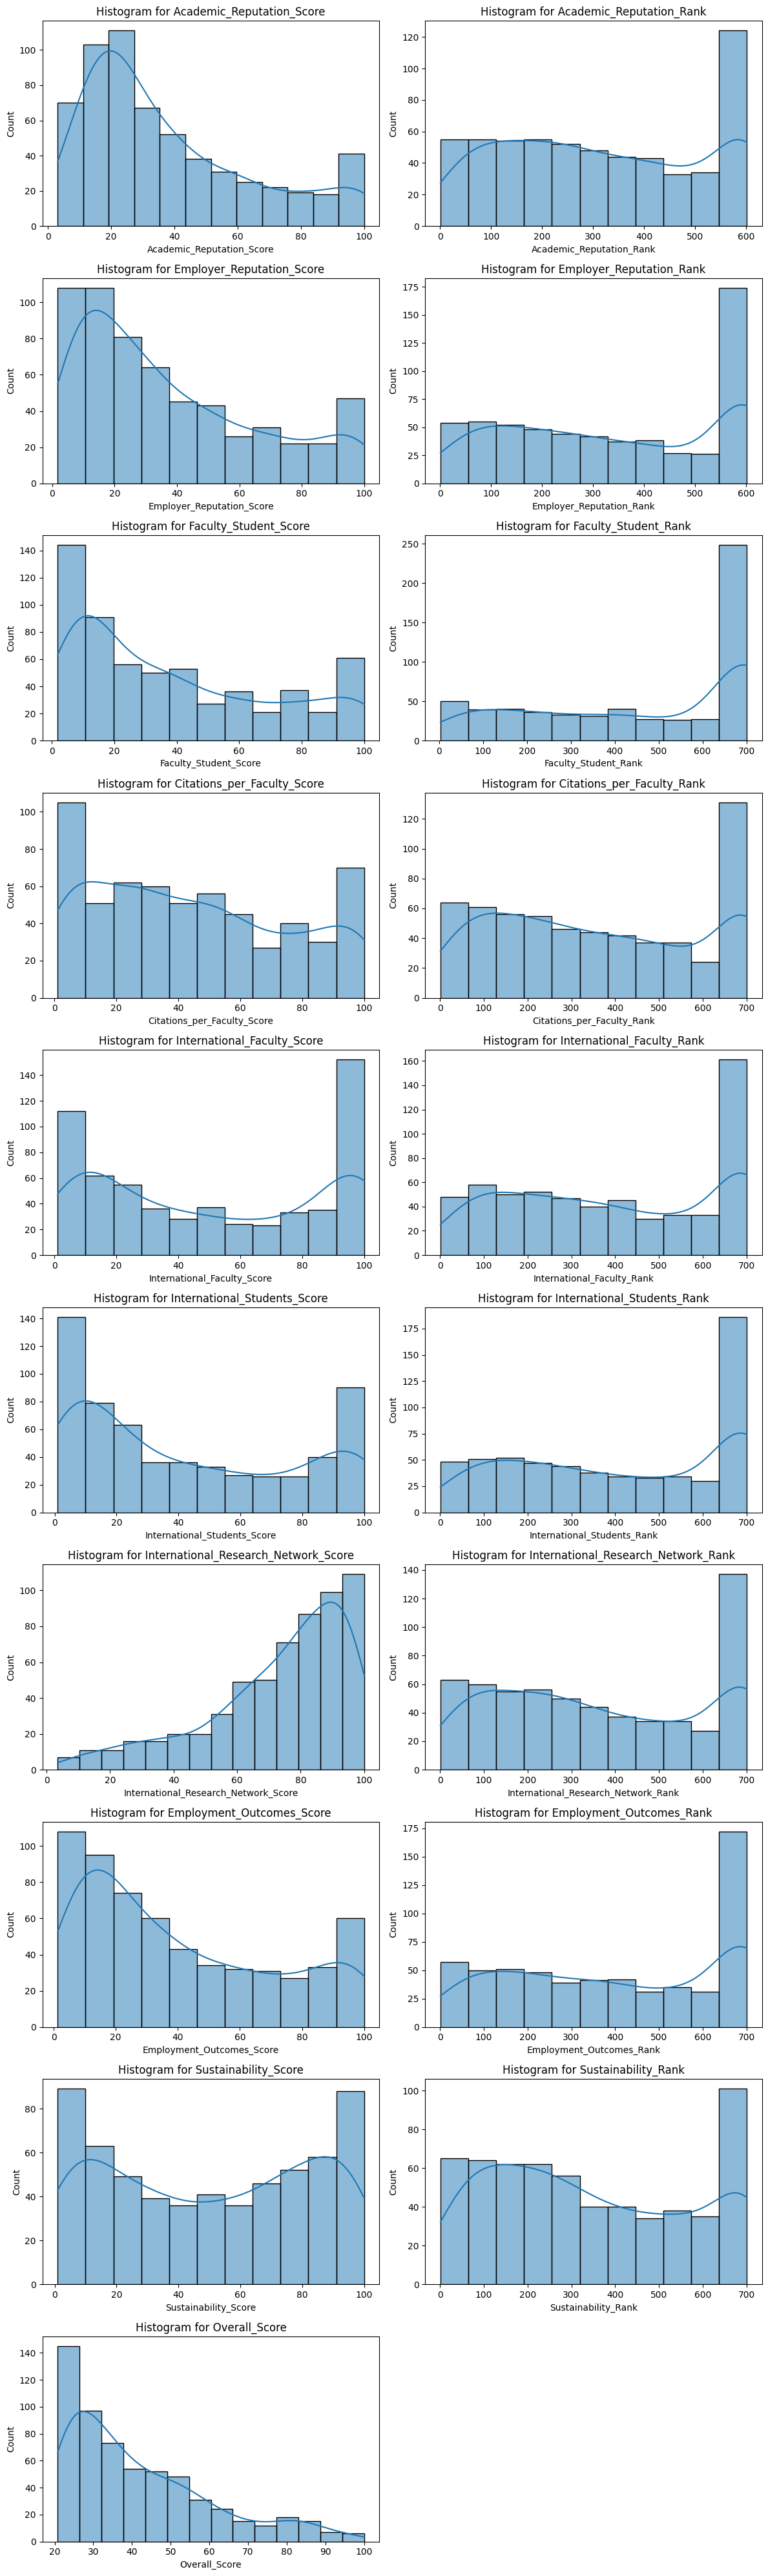

In [18]:


num_cols = df.select_dtypes(include='number')

n_cols = 2
n_rows = (len(num_cols.columns) + 1) // n_cols  # dynamic row count

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 4 * n_rows))
axes = axes.flatten()

for i, col in enumerate(num_cols.columns):
    sns.histplot(df[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Histogram for {col}')


for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


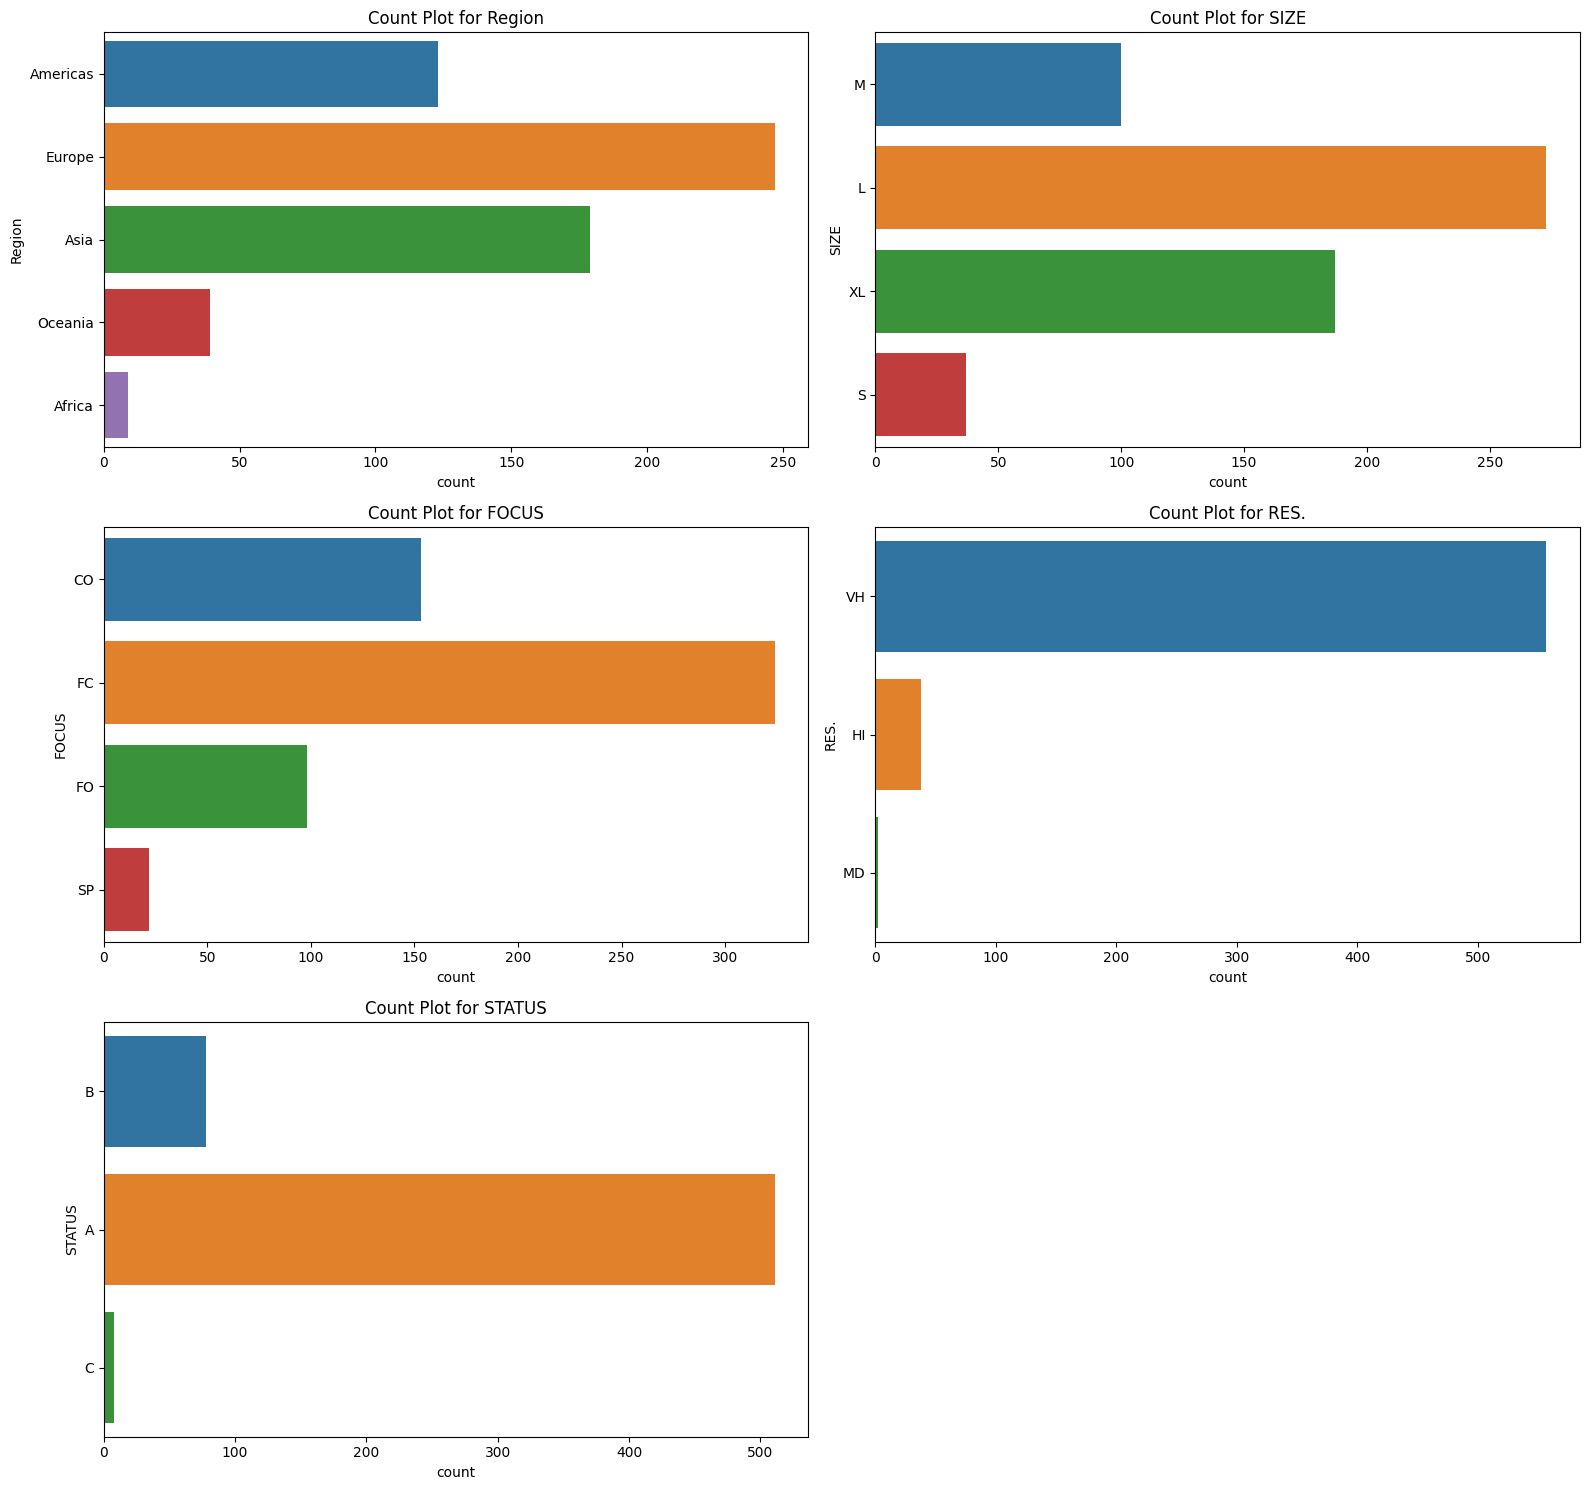

In [19]:


cat_cols = ['Region', 'SIZE', 'FOCUS', 'RES.', 'STATUS']

n_cols = 2
n_rows = (len(cat_cols) + 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 5 * n_rows))
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    sns.countplot(data=df, y=col, ax=axes[i])
    axes[i].set_title(f'Count Plot for {col}')
      # Optional: Rotate x-axis labels

# Hide any extra empty subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


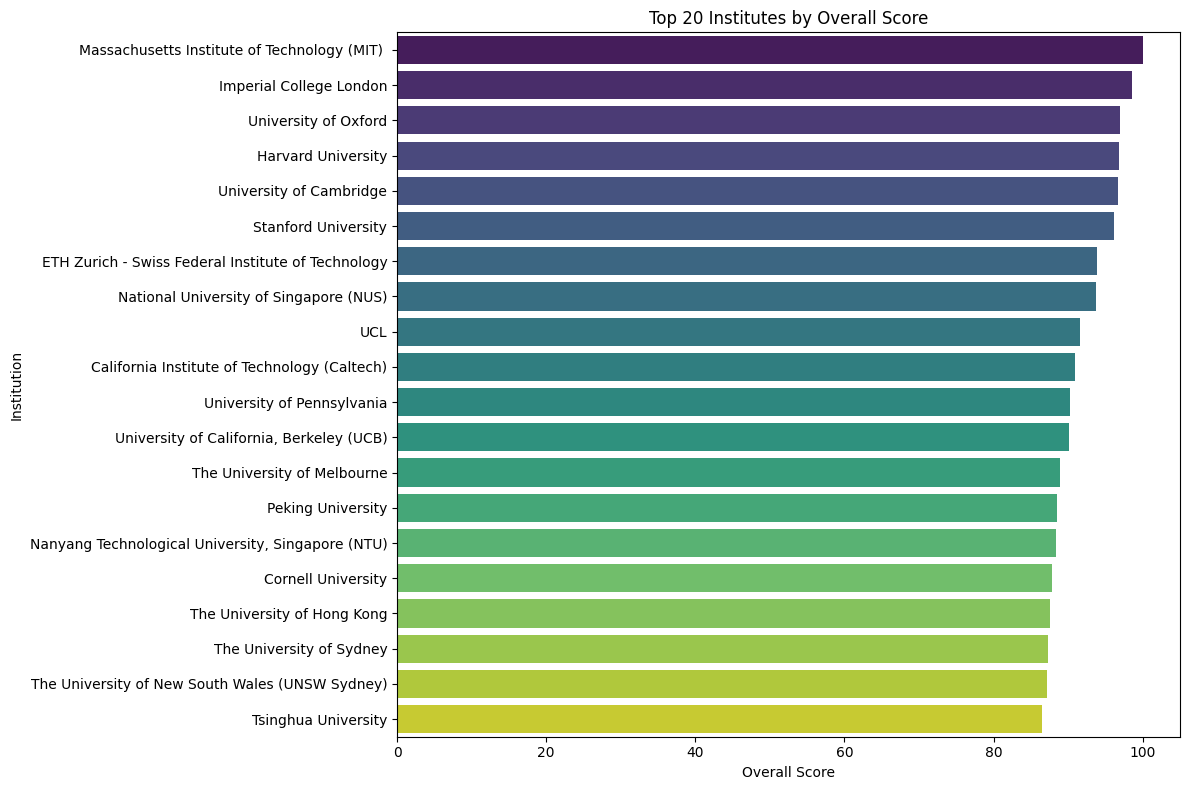

In [20]:
top20 = df[df['Overall_Score'].notna()].sort_values('Overall_Score', ascending=False).head(20).reset_index(drop=True)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.barplot(data=top20, x='Overall_Score', y='Institution_Name', palette='viridis')
plt.title('Top 20 Institutes by Overall Score')
plt.xlabel('Overall Score')
plt.ylabel('Institution')
plt.tight_layout()
plt.show()


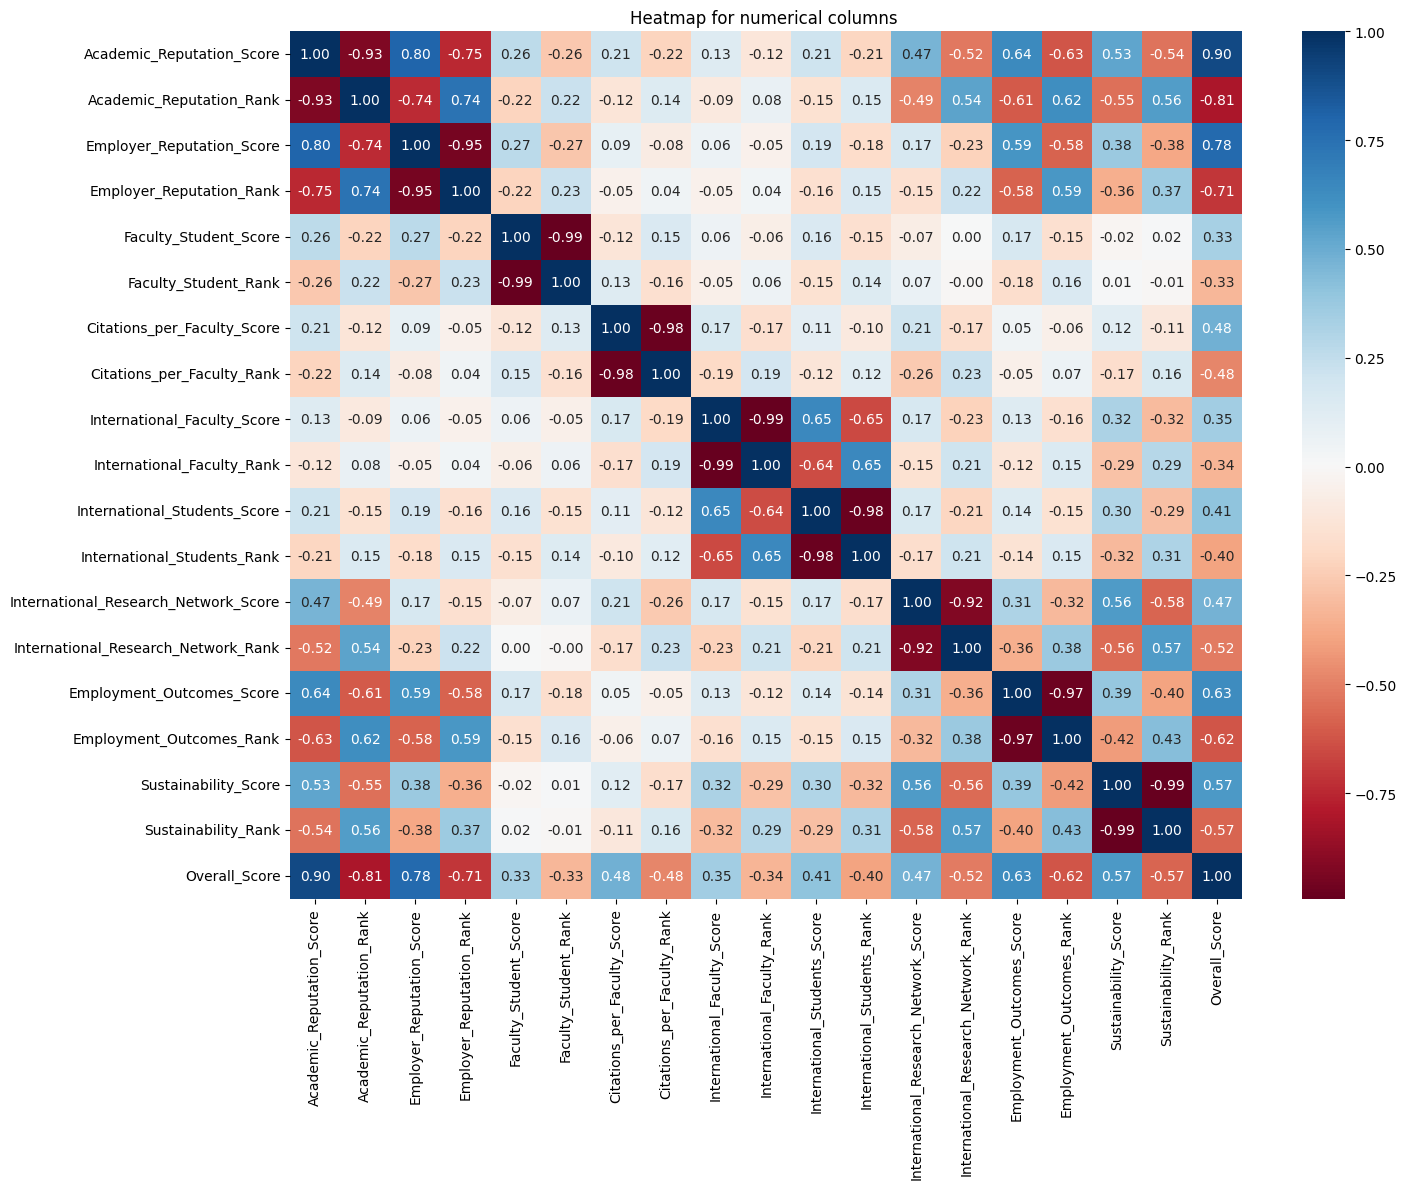

In [21]:
plt.figure(figsize = (15 , 12))
sns.heatmap(df.select_dtypes(include = 'number').corr()  , annot = True , fmt = ".2f" , cmap = 'RdBu')
plt.title("Heatmap for numerical columns ")
plt.tight_layout()
plt.show()

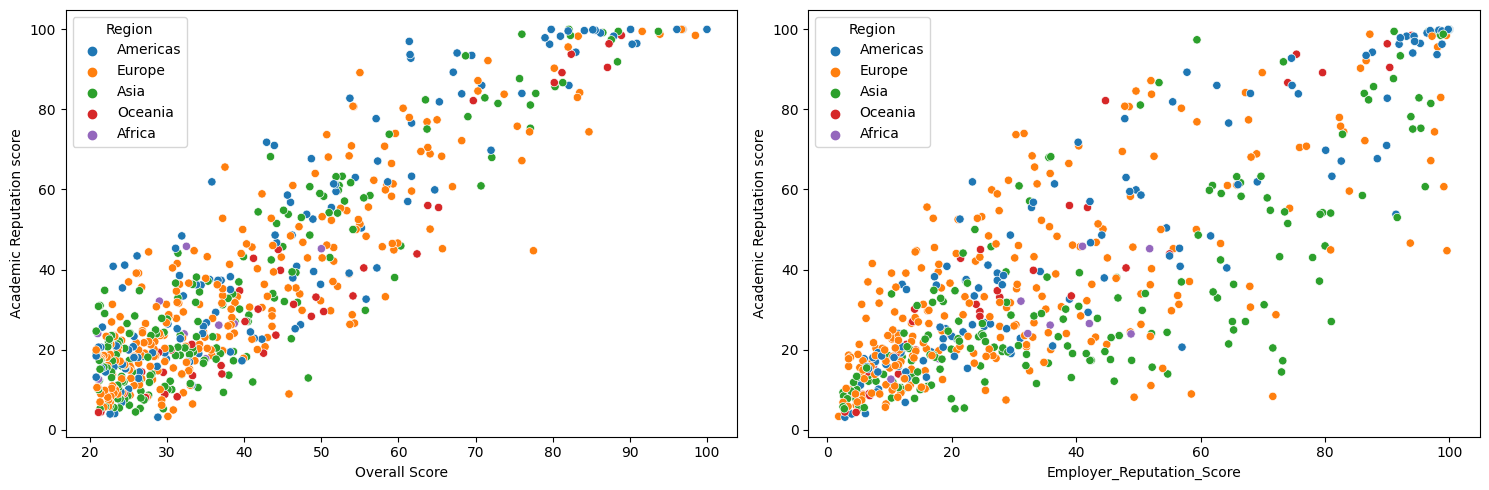

In [22]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
sns.scatterplot(x = df['Overall_Score'] , y = df['Academic_Reputation_Score'] , hue = df['Region'])
plt.xlabel("Overall Score")
plt.ylabel("Academic Reputation score")


plt.subplot(1,2,2)
sns.scatterplot(x = df['Employer_Reputation_Score'] , y = df['Academic_Reputation_Score'] , hue = df['Region'])
plt.xlabel("Employer_Reputation_Score")
plt.ylabel("Academic Reputation score")
plt.tight_layout()
plt.show()



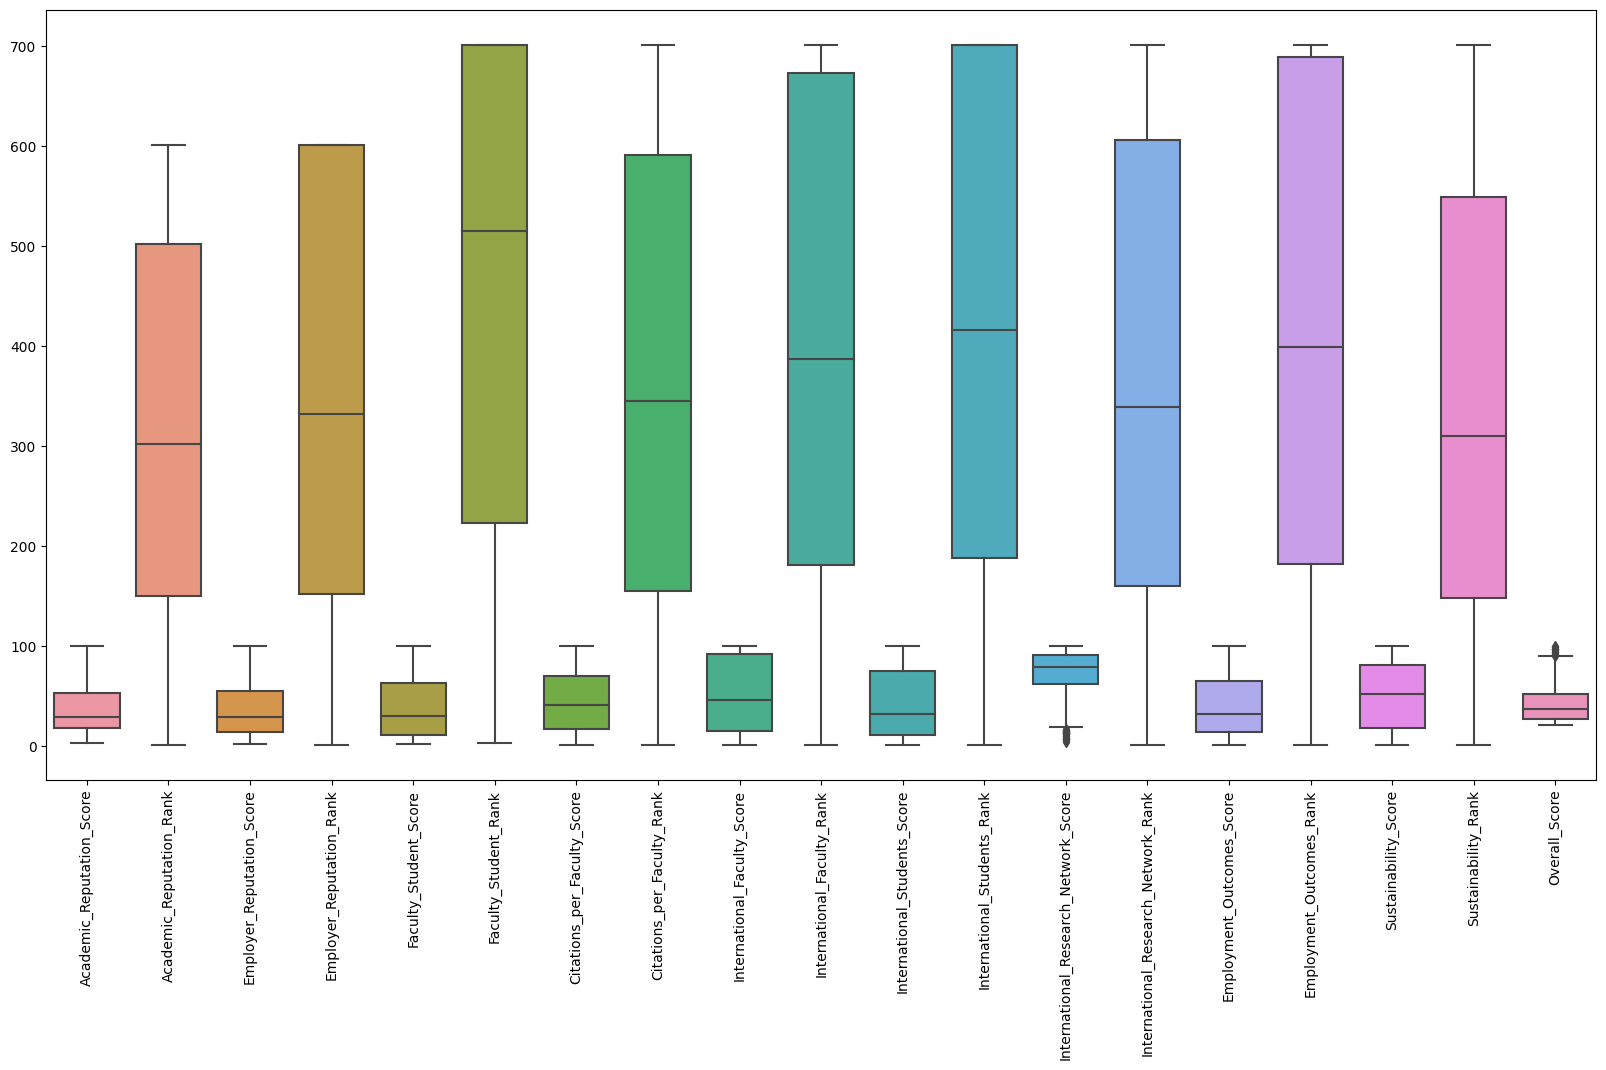

In [23]:
plt.figure(figsize = (20 , 10))
sns.boxplot(df)
plt.xticks(rotation = 90)
plt.show()

# Training and testing 

In [24]:
Label = LabelEncoder()
categorical_cols = ["Location", "Region", "SIZE", "FOCUS", "RES.", "STATUS"]

for i in categorical_cols: 
    df[i] = Label.fit_transform(df[i])

In [27]:
X = df.drop(['RANK_2025'	,'RANK_2024'	,'Institution_Name' , "Overall_Score" ] , axis = 1)
y =df['Overall_Score']

X_train , X_test , y_train , y_test = train_test_split(X , y , random_state = 42 , test_size = 0.2)

In [28]:
scale = RobustScaler()

X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

In [32]:

models = {
    "XGBRegressor": XGBRegressor(),
    "RandomForestRegressor": RandomForestRegressor(),
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "ElasticNet": ElasticNet(),
    "SVR": SVR()
}


param_grids = {
    "XGBRegressor": {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5]
    },
    "RandomForestRegressor": {
        'n_estimators': [100, 200],
        'max_depth': [None, 10],
    },
    "LinearRegression": {},
    "Ridge": {
        'alpha': [0.1, 1.0, 10]
    },
    "Lasso": {
        'alpha': [0.01, 0.1, 1.0]
    },
    "ElasticNet": {
        'alpha': [0.1, 1.0],
        'l1_ratio': [0.1, 0.5, 0.9]
    },
    "SVR": {
        'C': [1.0, 10],
        'kernel': ['linear', 'rbf']
    }
}


In [33]:


results = []

for name, model in models.items():
    param_grid = param_grids.get(name, {})
    grid = GridSearchCV(model, param_grid, cv=3, scoring='r2', n_jobs=-1)
    grid.fit(X_train, y_train)
    
    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_test)
    
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    
    results.append((name, r2, mse))

# Results as DataFrame
import pandas as pd

results_df = pd.DataFrame(results, columns=['Model', 'R2_Score', 'MSE'])
print(results_df.sort_values(by='R2_Score', ascending=False))


                   Model  R2_Score        MSE
6                    SVR  0.993158   2.294182
4                  Lasso  0.993118   2.307611
2       LinearRegression  0.993025   2.338869
3                  Ridge  0.992979   2.354138
5             ElasticNet  0.992075   2.657429
0           XGBRegressor  0.976841   7.765509
1  RandomForestRegressor  0.950981  16.436977
